# DATA ANALYSIS FOR VISITORS TO KENYA BETWEEN 1991-2014

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Read Datasets 

In [35]:
df= pd.read_csv('Visitors_to_Kenya_between1991_to_2014_For_Developers.csv')

df.drop(columns=['Year_Text','OBJECTID'],inplace=True)
#df.Year_Text=df.Year_Text.astype('int')

In [36]:
df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status
0,Arrivals,03/31/2005 12:00:00 AM,264600,Visitors on Holiday,Q1,Actual
1,Arrivals,06/30/1991 12:00:00 AM,149400,Visitors on Holiday,Q2,Actual


In [37]:
#df.isnull().sum().sum() IS ZERO

### Getting outliers using (mean+-1.968std) in coulmns then replacing with mean value

In [38]:
Meangrade=df['No_of_Visitors_to_Kenya'].mean()
std=df['No_of_Visitors_to_Kenya'].std()
toprange=Meangrade+std*1.96
bottomrange=Meangrade-std*1.96
df=df.replace(to_replace=(df[df['No_of_Visitors_to_Kenya']>toprange].index),value=Meangrade)
df=df.replace(to_replace=(df[df['No_of_Visitors_to_Kenya']<bottomrange].index),value=Meangrade)

### Convertion of time into pandas datetime format

In [39]:
df['Date_End_of_Quater']=df['Date_End_of_Quater'].map(pd.to_datetime)

### Function for Calling the year and creating a year column

In [40]:
def get_year(DT):
    return DT.year
df['Year']=df['Date_End_of_Quater'].map(get_year)
df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,Year
0,Arrivals,2005-03-31,264600,Visitors on Holiday,Q1,Actual,2005
1,Arrivals,1991-06-30,149400,Visitors on Holiday,Q2,Actual,1991


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 7 columns):
Arrival_or_Departure       832 non-null object
Date_End_of_Quater         832 non-null datetime64[ns]
No_of_Visitors_to_Kenya    832 non-null int64
Visitors_by_Purpose        832 non-null object
Period_Quater              832 non-null object
Results_Status             832 non-null object
Year                       832 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 45.6+ KB


### Sorting Year column in Ascending Order

In [42]:
df=df.sort_values(by='Year',ascending=False)
df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,Year
335,Departures,2014-12-31,48100,Visitors on Business,Q4,Preliminary,2014
749,Departures,2014-09-30,40400,Other,Q3,Preliminary,2014


# DATA VISUALIZATION

### Quick visualization of how different columns relate

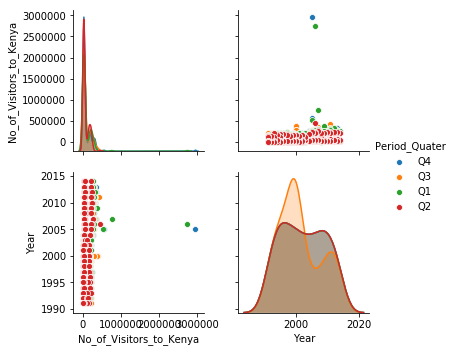

In [43]:
sns.pairplot(data=df,hue='Period_Quater')

## Scatter Plot With Regressionline

Text(0.5, 1.0, 'Scatterplot representing how the no of visitors have been distributed')

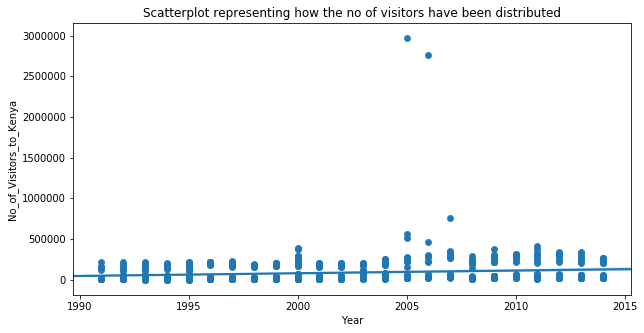

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year',y='No_of_Visitors_to_Kenya',data=df)
sns.regplot(x='Year',y='No_of_Visitors_to_Kenya',data=df)
plt.title('Scatterplot representing how the no of visitors have been distributed')

## Line Plot

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


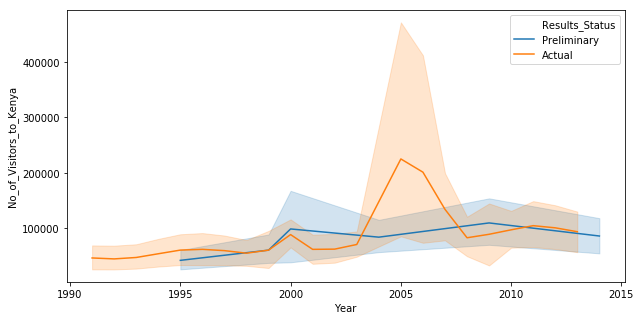

In [45]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Results_Status']))

#print(plt.title())

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


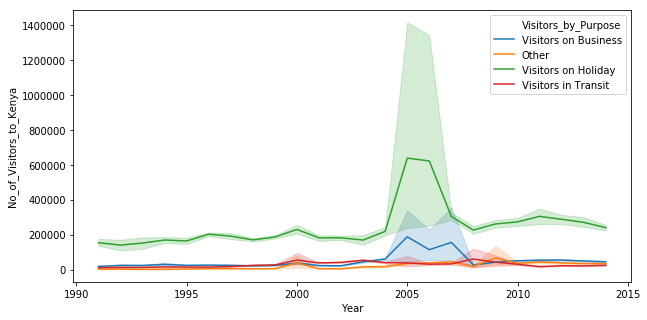

In [46]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Visitors_by_Purpose']))

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


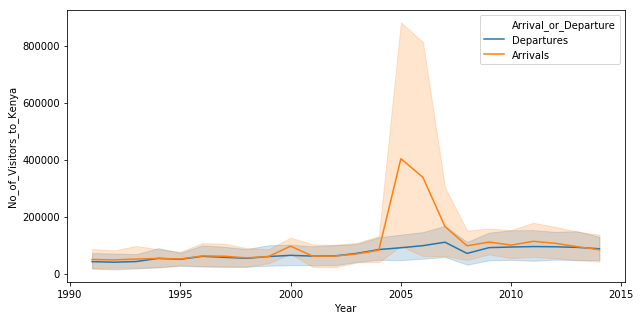

In [47]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Arrival_or_Departure']))

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


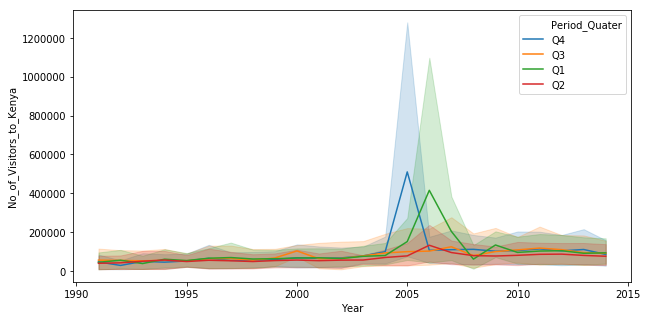

In [48]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Period_Quater']))

## Bar Plot

Figure(720x288)
AxesSubplot(0.125,0.125;0.775x0.755)


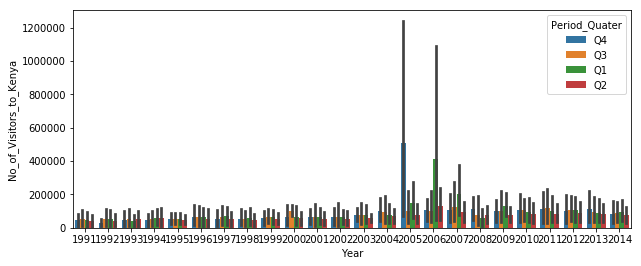

In [49]:
print(plt.figure(figsize=(10,4)))
print(sns.barplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Period_Quater']))

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


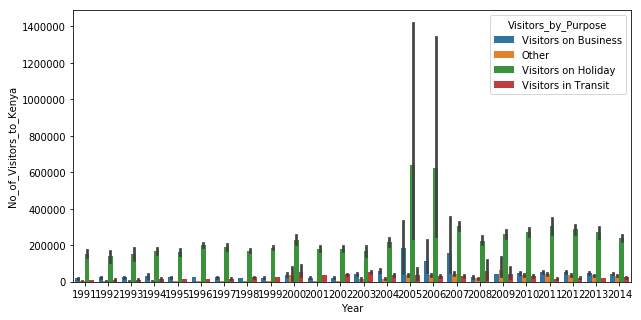

In [50]:
print(plt.figure(figsize=(10,5)))
print(sns.barplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Visitors_by_Purpose']))

## Swarm plot

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, 'Distribution of No of Visitors in each Quater')


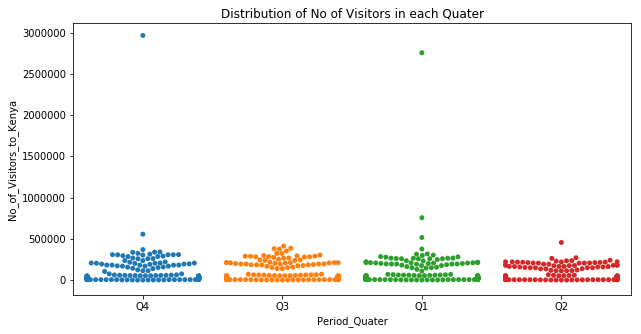

In [51]:
print(plt.figure(figsize=(10,5)))
print(sns.swarmplot(x='Period_Quater',y='No_of_Visitors_to_Kenya',data=df))
print(plt.title('Distribution of No of Visitors in each Quater'))

Text(0.5, 1.0, 'Distribution of No of Visitors in regard to the purpose of visit')

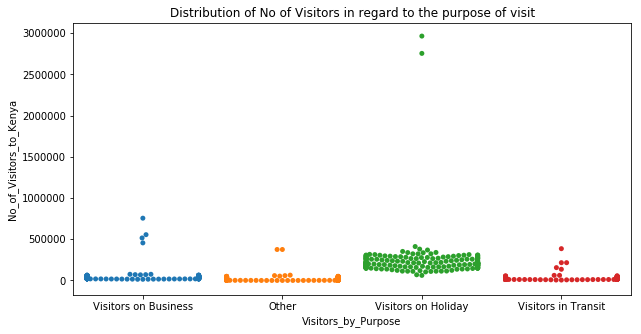

In [52]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Visitors_by_Purpose',y='No_of_Visitors_to_Kenya',data=df)
plt.title('Distribution of No of Visitors in regard to the purpose of visit')

## Histogram Plot

### Histogram for an Attribute in dataset

Text(0.5, 1.0, 'Histogram representing Distribution of No of visitors to kenya')

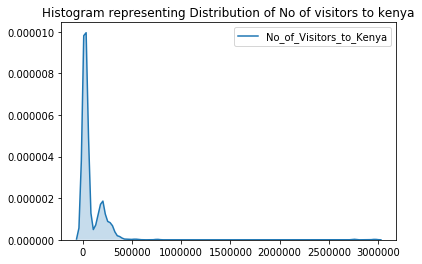

In [53]:
sns.kdeplot(df['No_of_Visitors_to_Kenya'],shade=True)
plt.title('Histogram representing Distribution of No of visitors to kenya')


### Histogram For two Attributes 

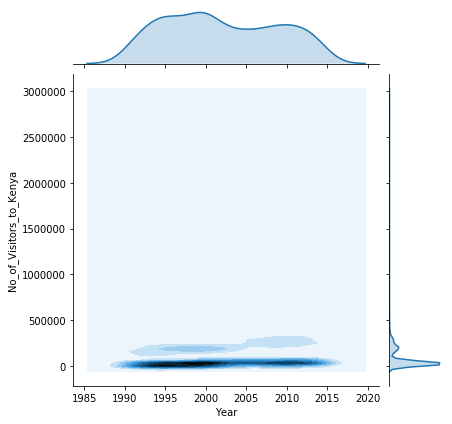

In [54]:
sns.jointplot(x=df['Year'],y=df['No_of_Visitors_to_Kenya'],kind='kde')

# MACHINE LEARNING(PREDICTIVE ANALYTICS)

### Creating a variable for categorical values inthe DataFrame

In [55]:
cat_df=pd.DataFrame(df[['Period_Quater','Visitors_by_Purpose','Arrival_or_Departure','Results_Status']])

## Encoding categorical data into numbers using LabelEncoder

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label=LabelEncoder()
for col in cat_df:
    cat_df[col]=label.fit_transform(cat_df[col])
    
cat_df.head(2)

,Period_Quater,Visitors_by_Purpose,Arrival_or_Departure,Results_Status
335,3,2,1,1
749,2,0,1,1


### Concatinated df dataframe and my encoded dataframe(cat_df)

In [58]:
df=pd.concat([df,cat_df],axis=1)
df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,Year,Period_Quater,Visitors_by_Purpose,Arrival_or_Departure,Results_Status
335,Departures,2014-12-31,48100,Visitors on Business,Q4,Preliminary,2014,3,2,1,1
749,Departures,2014-09-30,40400,Other,Q3,Preliminary,2014,2,0,1,1


### Split Our data Into 2 for training and testing

In [73]:
num_df=df.select_dtypes(exclude='object')
num_df.tail(2)

,Date_End_of_Quater,No_of_Visitors_to_Kenya,Year,Period_Quater,Visitors_by_Purpose,Arrival_or_Departure,Results_Status
417,1991-06-30,5100,1991,1,1,0,0
772,1991-06-30,1200,1991,1,0,1,0


In [74]:
from sklearn.model_selection import train_test_split

#### Choose features and Target Predictor

In [108]:
feature=num_df.Year

In [116]:
X=np.array(feature).reshape(-1,1)

In [117]:
y=df.No_of_Visitors_to_Kenya

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Define Your model

In [119]:
from sklearn import linear_model

In [120]:
visitors_model=linear_model.LinearRegression()

## Fit our model using the trainind dataset

In [121]:
visitors_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Get the coefficients

In [122]:
print('coefficients: {}'.format(visitors_model.coef_))
print('intercept: {}'.format(visitors_model.intercept_))

coefficients: [2978.36748265]
intercept: -5882103.1011969745


## Y=MX+C

In [123]:
predict_y=visitors_model.predict(X_test)

### I want to predict at 2015 how many visitors will come to kenya

In [132]:
new_year=2015
new_year=np.array(new_year).reshape(1,-1)

#### Then predict

In [134]:
print('Predicted No of visitors 2015: \n {}'.format(visitors_model.predict(new_year)))

Predicted No of visitors 2015: 
 [119307.37633323]


#### Evaluate how Accurate our prediction

In [135]:
from sklearn import metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,predict_y)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test,predict_y)))#square of MAE
print('RMSE: {}'.format(np.sqrt(metrics.mean_absolute_error(y_test,predict_y))))#squaroot of MAE

MAE: 93702.34484534166
MSE: 50785093819.555984
RMSE: 306.1083874142322


### PLotting Our predicted value

Text(0.5, 1.0, 'Scatter plot of Trained data')

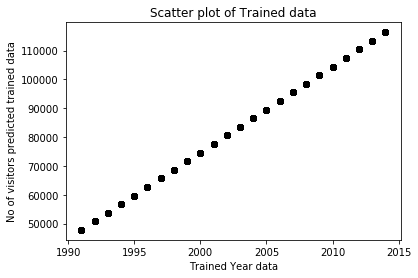

In [136]:
plt.scatter(X_train,visitors_model.predict(X_train),color='black')
plt.xlabel('Trained Year data')
plt.ylabel('No of visitors predicted trained data')
plt.title('Scatter plot of Trained data')

### PLotting Our predicted value

Text(0.5, 1.0, 'Scatter plot of Test data')

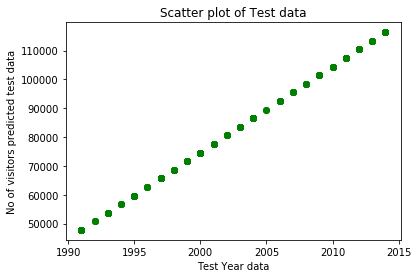

In [137]:
plt.scatter(X_test,visitors_model.predict(X_test),color='green')
plt.xlabel('Test Year data')
plt.ylabel('No of visitors predicted test data')
plt.title('Scatter plot of Test data')
